# The TSP 

Traveling Salesman Problems are discrete problems that are relatively often discussed in computing problems.
In such a problem, a list of city coordinates is given, and the objective is to find the shortest route passing from all the cities (exactly once) and ending up in the initial city. TSP is a NP-Hard problem in combinatorial optimization.

In this initial approach we will try to solve the problem using the **Ant System** algorithm.

# The algorithm

In the Ant System, there are several parameters that need to be evaluated in order to find the optimal route (marked by obtaining the route with the smallest possible distance). 
Trades-off in setting some of these parameters greatly affect the quality of the solutions provided by the algorithm. These parameters are:

* $ Q $: A constant determining the quantity of pheromon
* $ \ rho $: Pheromon evaporation rate
* $ \ alpha $: A weight parameter that regulates the importance of the pheromon trace when exploring in search of a possible solution
* $ \ beta $: Parameters related to the distance of a route ($ \ frac {1} {distance} $) #fixme: explain  better

#just to keep track

* $ Q $: 0.2
* $ \ rho $: 0.2
* $ \ alpha $: 11
* $ \ beta $: 14

 ** 200 iterations ** with ** 50 ants **.


# Code 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

In [2]:
def plotGraph(vertex_list,route):
    
    # vertex_list: 3 column node list (n, x_coord, y_coord)
    # route   : the route to be plotted
    # output: tour visualization
    
    x_coord = []
    y_coord = []
    
    for i in range(len(route)):
        x_coord.append(vertex_list[route[i]][1])
        y_coord.append(vertex_list[route[i]][2])
        
    plt.plot(x_coord,y_coord,'bo',linestyle='-')
    plt.title("Best Route Found",loc='center',fontweight='bold')
    plt.show()

In [3]:
def distance_matrix_gen (vertex_list):
    #output: distance matrix ([16x16] for the moment) containing the distance between nodes 
    #        assuming a fully connected graph
    
    distances = np.zeros((len(vertex_list),len(vertex_list)))
    
    for i in range (len(vertex_list)):
        
        for j in range (len(vertex_list)):
            distances[i][j] = math.sqrt((vertex_list[i][1]-vertex_list[j][1])**2 + (vertex_list[i][2]-vertex_list[j][2])**2)          
    
    return (distances)

def start_vertex_init (n_ants,n_vertex):
    
    # individual: n of ants
    # n_nodes : n of nodes
    #output:        : visited_list containing the initial (and thus final) node for every ant
    
    start_nodes= []
    
    for i in range (n_ants):        
        start_nodes.append([0 for i in range(n_vertex+1)])
        start_nodes[-1][0] = random.randint(0,(n_vertex-1))
        start_nodes[-1][-1] = start_nodes[-1][0]
    
    return start_nodes

def evaluate_best_city (curr_vertex, distance_matrix ,tau, visited_list, alpha, beta):
    
    #Evaluate the best possible routes 
    # curr_vertex: current expl node
    # visited_list :  already visited list
    # tau: the pheromon intensity
    # output: the most likely city (highest probability)

    probability = [0] * np.size(distance_matrix[1])
    allowed = []
    allowed[:] = [x_coord for x_coord in range(np.size(distance_matrix[1])) if x_coord not in visited_list]
    p = 0
    
    for i in allowed:
        visibility = 1/distance_matrix[curr_vertex][i]
        p += (tau[curr_vertex][i]**alpha)*(visibility**beta)
    
    for i in allowed:
        visibility = 1/distance_matrix[curr_vertex][i]
        probability[i] = (tau[curr_vertex][i]**alpha)*(visibility**beta)/p
    
    tmp = max(probability)
    return probability.index(tmp)

def update_tau(n_ants, tau, visited_lists, one_ant_tour, evaporation_coeff, Q,n_vertex):
    # evaporation:  pheromon evaporation coefficient
    # tau
    # one_ant_tour:         array ([1x16] for now) containing tour distance information produced by one ant
    # delta_tau: pheromon update rate
    # output:    updated tau

    for i in range (n_ants):
    
        for j in range (n_vertex):
            delta_tau = Q/one_ant_tour[i]
            tau[visited_lists[i][j],visited_lists[i][j+1]] = evaporation_coeff * tau[visited_lists[i][j],visited_lists[i][j+1]] + delta_tau
    
    return (tau)

def calc_distance_single_route(single_solution,distance_matrix):
    # single_solution: one ant solution 
    # distance_matrix: distance matrix between nodes
    # output: The total distance of the solution

    dist = 0
    
    for i in range (len(single_solution)-1):
        dist += distance_matrix[single_solution[i]][single_solution[i+1]]       
    
    return (dist)

def compute_shortest_distances(visited_lists, distance_matrix):
    # output:   the smallest distance found (float), 
    #           route with the smallest distance (list),
    #           distance list (one_ant_tour) (list),
    #           average distance found (float))
    
    distances = []
    distances = [0] * len(visited_lists)
    
    for i in range(0,len(visited_lists)):
        distances[i] = calc_distance_single_route(visited_lists[i],distance_matrix)
    
    one_ant_tour = distances
    one_ant_tour = one_ant_tour- 0.97*min(one_ant_tour)
    return (min(distances) , visited_lists[distances.index(min(distances))] , one_ant_tour, np.mean(distances))

############### Epoch:  1 ###############
Route     :  [33, 34, 37, 36, 35, 31, 30, 29, 28, 1, 2, 3, 4, 5, 7, 6, 8, 9, 11, 12, 13, 14, 15, 16, 19, 18, 17, 20, 21, 25, 27, 26, 64, 65, 66, 67, 63, 62, 61, 60, 59, 58, 57, 53, 52, 54, 50, 48, 42, 41, 40, 39, 38, 32, 43, 44, 45, 46, 47, 24, 23, 22, 10, 49, 51, 55, 56, 68, 69, 81, 80, 82, 90, 89, 88, 86, 85, 84, 83, 73, 74, 72, 71, 70, 75, 76, 77, 87, 91, 92, 93, 95, 94, 78, 79, 0, 33]
Best Route:  577.8477025247987


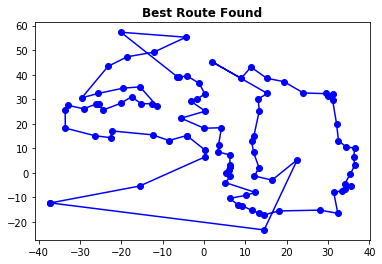

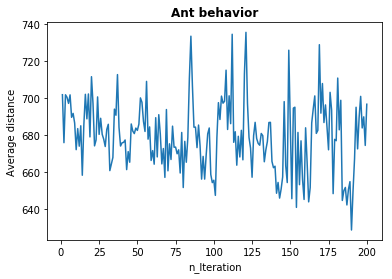

n_epochs time so far:  236.01 second
############### END OF Epoch:  1 ###############


577.8477025247987


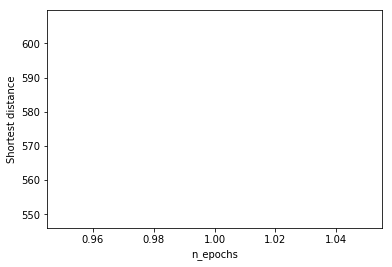

Total n_epochs time                      :  236.56 second


In [10]:
#if __name__ == '__main__':    #script ready
    n_epochs = 1
    best_distance_list = []
    start_time = time.clock()
    for epoch in range (n_epochs):
        print ("############### Epoch: ",epoch+1,"###############")
        n_it = 200
        alpha = 11 
        beta = 14
        n_ants = 50
        n_vertex = 96
        evaporation_coeff = 0.8
        Q = 0.2
        vertex_list = []

        file = open ("city_coord.tsp",'r')
        file.readline().strip().split()[1]
        for i in range (0,n_vertex):
            n, x_coord,y_coord = file.readline().strip().split()
            vertex_list.append([int(n),float(x_coord),float(y_coord)])
        #vertex_list=np.array(vertex_list, dtype="int32")
        distance_matrix = distance_matrix_gen(vertex_list)
        tau = np.ones(np.shape(distance_matrix))*0.0001 
        delta_tau = np.zeros((n_vertex,n_vertex))

        shortest_distance = math.inf #infinit

        shortest_route = []
        average = []
        for i in range (n_it):
            visited_lists = start_vertex_init(n_ants,n_vertex)
            for j in range (1,n_vertex):
                for k in range (n_ants):
                    visited_lists[k][j] = evaluate_best_city(visited_lists[k][j-1],distance_matrix,tau, visited_lists[k],alpha,beta)
            min_dist,route,one_ant_tour,rerata = compute_shortest_distances(visited_lists,distance_matrix)
            average.append(rerata)

            if shortest_distance > min_dist :
                shortest_distance = min_dist
                shortest_route = route
                
            tau = update_tau(n_ants, tau, visited_lists, one_ant_tour, evaporation_coeff, Q,n_vertex)

        print ("Route     : ",route)
        print ("Best Route: ",shortest_distance)
        best_distance_list.append(shortest_distance)
        plotGraph(vertex_list,shortest_route)
        
        plt.plot([i for i in range (1,n_it+1)],average)
        plt.title("Ant behavior",loc='center',fontweight='bold')
        plt.xlabel("n_Iteration")
        plt.ylabel("Average distance")
        plt.show()
        
        print ("n_epochs time so far: ","%.2f" %(time.clock() - start_time),"second")
        print ("############### END OF Epoch: ",epoch+1,"###############")
        print ()
        print ()
        
    for shortest in best_distance_list:
        print (shortest)   
    
    plt.plot([i for i in range (1,n_epochs+1)],best_distance_list)
    plt.xlabel("n_epochs")
    plt.ylabel("Shortest distance")
    plt.show()
    #print ("The average shortest route produced: ",np.average(best_distance_list))
    print ("Total n_epochs time                      : ","%.2f" %(time.clock() - start_time),"second")